## Training a logistic regression model for 2D data with pytorch

In this example, we define a logistic regression model for classifying 2-dimensional vectors to two classes.

The first step is to define our classification model. We use the torch Module and redefine the forward step consisting of a linear projection (2D -> 1D; no bias term) followed by logistic sigmoid.

In [33]:
import torch

# Define our model (logistic regression)

class LogReg(torch.nn.Module):

    def __init__(self):
        
        super(LogReg, self).__init__()
        
        # Define network components
        self.projection = torch.nn.Linear(2, 1, bias = False) # From 2d to 1d
        self.activation = torch.nn.Sigmoid()
        
        # Initialize projection weights to zero
        self.projection.weight.data.fill_(0.0)
        
    def forward(self, x):
        # Define the full pipeline
        
        y = self.projection(x)
        y = self.activation(y)
        
        return y

Now we are ready to train the logreg model. We need to cast our numpy data to a torch tensor and initialize the weights to zero (for reproducibility).

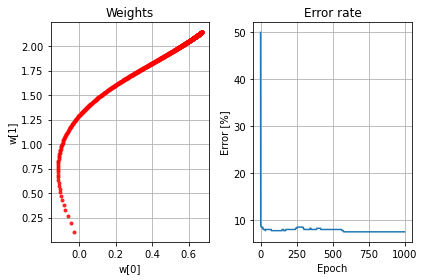

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

# Load data

X = np.loadtxt("X.csv", delimiter = ",").astype(np.float32)
y = np.loadtxt("y.csv", delimiter = ",").astype(np.float32)
y[y == -1] = 0

# Initialize the model and inputs

model = LogReg()

X = torch.from_numpy(X)
y = torch.from_numpy(y).reshape(-1,1)

# Define loss function. (Binary) cross entropy loss is another name for logistic loss.
loss_function = torch.nn.BCELoss()

num_epochs = 1000 # Number of iterations over all data

# Store weight and accuracy history for plotting later
weight_history = torch.zeros(num_epochs, 2)
acc_history    = torch.zeros(num_epochs)

# learning_rate defines how large steps we take
learning_rate = 0.1

for epoch in range(num_epochs):

    # Feed all samples
    y_pred = model(X)

    # Compute loss...
    loss = loss_function(y_pred, y_true)
    
    # ...and gradient
    model.zero_grad()
    loss.backward()

    # Apply the gradient step to all parameters
    for p in model.parameters():
        p.data -= p.grad.data * learning_rate

    weight_history[epoch, :] = model.projection.weight
    
    # Compute the classification accuracy
    accuracy = torch.mean(torch.abs(torch.round(y_pred) - y))
    acc_history[epoch] = accuracy
    
weight_history = weight_history.detach().numpy()
acc_history    = acc_history.detach().numpy()

# Plot results.
fig, ax = plt.subplots(1, 2)
ax[0].plot(weight_history[:, 0], weight_history[:, 1], 'r.', alpha = 0.8)    
ax[0].set_title("Weights")
ax[0].set_xlabel("w[0]")
ax[0].set_ylabel("w[1]")
ax[0].grid(True)

ax[1].plot(100 * acc_history)
ax[1].set_title("Error rate")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Error [%]")
ax[1].grid(True)

plt.tight_layout()
plt.show()
